# Machine Translation

English-German Translation

using only 2015 data

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# What's life without style :). So, let's add style to our dataframes
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [0]:
import pandas as pd 
import string 
import pickle
from pickle import dump
from pickle import load
from string import digits
import re 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import array, argmax, random, take 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [0]:
from keras.models import Model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Input,RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model 
from keras import optimizers 

In [63]:
!  pip install version_information

In [64]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,re,sklearn, matplotlib,keras

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
re 2.2.1
sklearn 0.21.3
matplotlib 3.0.3
keras 2.2.5
Wed Sep 11 15:02:58 2019 UTC

# 2)- Reading Dataset

In [0]:
lines= pd.read_pickle('full_data.pkl')

In [67]:
lines.shape

(22191, 2)

In [68]:
lines.head()

,eng,ger
0,Prague Stock Market falls to minus by the end of the trading day,Die Prager Börse stürzt gegen Geschäftsschluss ins Minus.
1,After a sharp drop in the morning,Nach dem steilen Abfall am Morgen konnte die Prager Börse die Verluste korrigieren.
2,Transactions with stocks from the Czech Energy Enterprise (ČEZ) reached nearly half of the regular daily trading.,Die Transaktionen mit den Aktien von ČEZ erreichten fast die Hälfte des normalen Tagesgeschäfts.
3,The Prague Stock Market immediately continued its fall from Monday at the beginning of Tuesday's trading,Die Prager Börse knüpfte gleich zu Beginn der Dienstagsgeschäfte an den Einbruch vom Montag an
4,This time the fall in stocks on Wall Street is responsible for the drop.,Diesmal lag der Grund für den Einbruch an der Wall Street.


As this is big data and I have a poor old computing machine. So, I ll use smaller sample. It got to be random to avoid sample biaseness

In [69]:
lines.sample(15)

,eng,ger
19538,"SABMiller was the stand-out stock on the market, jumping 20% after it received a bid approach from rival AB InBev.","SABMiller war die herausragende Aktie auf dem Markt und machte einen Sprung von 20 %, nachdem Übernahme-Angebot des Rivalen AB InBev eingegangen war."
11882,- When did you realise that you must be an artist?,"- Wann wusstest du, dass du Maler werden musst?"
14786,"They themselves enjoy the fragrant, hot brew in a variet of formats.",Genießt das duftende heiße Gebräu in den verschiedensten Variationen selbst.
10762,"Universal suffrage, in order to be the sine qua non of democracy, is not enough and can actually become a ""tool of oppression"" as once said the republican philosopher Etienne Vacherot.","Das allgemeine Wahlrecht, das notwendige Bedingung der Demokratie darstellt, ist hierfür nicht ausreichende Bedingung und kann ebenso gut zum""Unterdrückungsinstrument"" werden, wie es damals der re..."
11844,"Or make it worse, by increasing the required volume of calculations.","Oder das Problem verstärken, da mehr Berechnungen notwendig wären."
16088,Pressure has been building on the FAA in recent years to ease restrictions on their use.,"In den letzten Jahren hat sich der Druck auf die FAA erhöht, Einschränkungen für den Gebrauch zu lockern."
19975,However the Fed cannot ignore the less rosy global outlook.,Jedoch kann die Fed den weniger rosigen Ausblick auf globale Verhältnisse nicht ignorieren.
4598,The promise of FonPeek,Die Versprechungen von FonPeek
15723,The only recourse is to slash wages and public spending - spurred on by Berlin.,"Die einzige Möglichkeit besteht darin, Löhne und öffentliche Ausgaben zu kürzen – angespornt von Berlin."
9906,Redefining the vocation,Berufung neu definieren


In [0]:
# choose 1st 5000 rows
lines=lines[:5000]

# 3)- Quick Preprocessing

In [0]:
# Lowercase all characters
lines.eng=lines.eng.apply(lambda x: x.lower())
lines.ger=lines.ger.apply(lambda x: x.lower())

In [0]:
# Remove quotes
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x))
lines.ger=lines.ger.apply(lambda x: re.sub("'", '', x))

In [0]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.ger=lines.ger.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [0]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.ger=lines.ger.apply(lambda x: x.translate(remove_digits))

In [0]:
# Remove extra spaces
lines.eng=lines.eng.apply(lambda x: x.strip())
lines.ger=lines.ger.apply(lambda x: x.strip())
lines.eng=lines.eng.apply(lambda x: re.sub(" +", " ", x))
lines.ger=lines.ger.apply(lambda x: re.sub(" +", " ", x))

**Do threshold here**

In [0]:
# Add start and end tokens to target sequences. I am not German so , I am doing so for my ease
lines.ger = lines.ger.apply(lambda x : 'START_ '+ x + ' _END')

In [77]:
lines.ger[:5]

0                                           START_ die prager börse stürzt gegen geschäftsschluss ins minus _END
1                 START_ nach dem steilen abfall am morgen konnte die prager börse die verluste korrigieren _END
2    START_ die transaktionen mit den aktien von čez erreichten fast die hälfte des normalen tagesgeschäfts _END
3     START_ die prager börse knüpfte gleich zu beginn der dienstagsgeschäfte an den einbruch vom montag an _END
4                                          START_ diesmal lag der grund für den einbruch an der wall street _END
Name: ger, dtype: object

In [78]:
lines.sample(10)

,eng,ger
3332,if his death is confirmed somali would be the second senior alqaeda or taliban leader killed since september when a similar strike killed najmuddin jalolov the leader of a militant faction in the ...,START_ wenn sich sein tod bestätigt würde wäre somali der zweite führende al kaida oder talibanführer der seit september getötet wurde als bei einem ähnlichen angriff najmuddin jalolov der führer ...
848,retailers are to decide for themselves if they want pass on the price increases to their customers,START_ die einzelhändler sollen selbst entscheiden _END
1173,it is much more an inner personality and character,START_ ihre persönlichkeit und ihr charakter ist in ihren herzen _END
1779,but these measures are necessary,START_ aber diese maßnahmen sind notwendig _END
3285,wow really she said thoughtfully when told of the schools low professortostudent ratio,START_ wow wirklich sagte sie nachdenklich als ihr das niedrige professorzustudentenverhältnis der schule berichtet wurde _END
3867,as you are well aware you have no right to the use of the acronym explains the udfs office requiring that the nc remove immediately any mention of the udf name from all material and from their int...,START_ wie sie wissen haben sie kein anrecht auf die verwendung dieses siegels erklärte die geschäftsstelle der udf und fordert die partei nc auf unverzüglich die erwähnung des namens udf von sämt...
1775,the deadline we had given was the opening of the markets this morning,START_ die frist _END
2764,yesterday the russian defence ministry finally admitted that it had tested an intercontinental ballistic missile not far from the norwegian border,START_ das russische verteidigungsministerium hat erst gestern eingeräumt dass unweit der norwegischen grenze eine interkontinentale ballistische rakete getestet wurde _END
2059,brc uses lithiumpolymer accumulators that are lighter and have a higher energy density,START_ das brc enthält lithiumpolymerbatterien _END
148,first virtual operator to arrive in czechia this year,START_ der erste virtuelle anbieter kommt bereits in diesem jahr nach tschechien _END


### 3a)- Vocab Size

In [0]:
# Vocabulary of English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)
# Vocabulary of German 
all_german_words=set()
for ger in lines.ger:
    for word in ger.split():
        if word not in all_german_words:
            all_german_words.add(word)

In [80]:
# Max Length of source sequence
import numpy as np
lenght_list=[]
for l in lines.eng:
    lenght_list.append(len(l.split(' ')))
max_length_src = np.max(lenght_list)
max_length_src

74

In [81]:
# Max Length of target sequence
lenght_list=[]
for l in lines.ger:
    lenght_list.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list)
max_length_tar

81

In [82]:
lines['word_eng'] = lines['eng'].apply(lambda x: len(str(x).split(" ")))
lines[['eng','word_eng']].head()

,eng,word_eng
0,prague stock market falls to minus by the end of the trading day,13
1,after a sharp drop in the morning,7
2,transactions with stocks from the czech energy enterprise čez reached nearly half of the regular daily trading,17
3,the prague stock market immediately continued its fall from monday at the beginning of tuesdays trading,16
4,this time the fall in stocks on wall street is responsible for the drop,14


In [83]:
# adding +2 due to adding of START and END
lines['word_ger'] = lines['ger'].apply(lambda x: len(str(x).split(" ")))
lines[['ger','word_ger']].head()

,ger,word_ger
0,START_ die prager börse stürzt gegen geschäftsschluss ins minus _END,10
1,START_ nach dem steilen abfall am morgen konnte die prager börse die verluste korrigieren _END,15
2,START_ die transaktionen mit den aktien von čez erreichten fast die hälfte des normalen tagesgeschäfts _END,16
3,START_ die prager börse knüpfte gleich zu beginn der dienstagsgeschäfte an den einbruch vom montag an _END,17
4,START_ diesmal lag der grund für den einbruch an der wall street _END,13


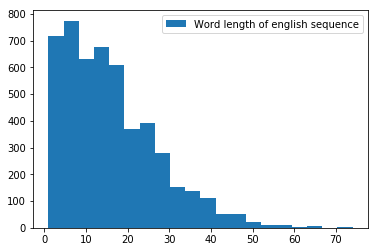

In [84]:
words_eng=lines['word_eng']
plt.hist(words_eng, bins=20, label="Word length of english sequence") 
plt.legend() 
plt.show()

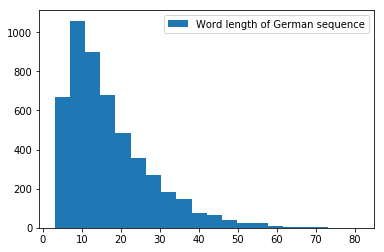

In [85]:
words_ger=lines['word_ger']
plt.hist(words_ger, bins=20, label="Word length of German sequence") 
plt.legend() 
plt.show()

### 3b)-Words' frequency

In [86]:
# let’s check the 10 most frequently occurring words in our English text data
freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[:10]
freq_eng

the     6786
of      2663
to      2262
in      1935
a       1733
and     1685
is      1015
for      893
that     874
on       757
dtype: int64

In [87]:
freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[:12]
freq_ger

_END      5000
START_    5000
die       3066
der       2998
und       1611
in        1445
den        941
von        918
das        872
zu         758
ist        687
für        655
dtype: int64

As we have start and end so, I did check 12 so that we get idea of most fequent words

**How about least occuring words**

In [88]:
less_freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[-10:]
less_freq_eng

centerstasks    1
proud           1
hindered        1
nonpayment      1
alejandro       1
heels           1
interstate      1
freely          1
hofbräu         1
disapproved     1
dtype: int64

In [89]:
less_freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[-10:]
less_freq_ger

jeff             1
ungenannten      1
distanz          1
richtlinien      1
belegte          1
versteigerten    1
wachsen          1
mladen           1
kurzsichtig      1
chefredaktor     1
dtype: int64

### 3a)- Defining input and target

In [90]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_german_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_german_words)
num_encoder_tokens, num_decoder_tokens

(10955, 15724)

In [91]:
num_decoder_tokens += 1 # For zero padding
num_decoder_tokens

15725

In [0]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [0]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [0]:
#print(reverse_input_char_index)

In [0]:
#print(reverse_target_char_index)

### 3b)-Train - Test Split

For validation

In [96]:
X, y = lines.eng, lines.ger #X being input, y being target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((4000,), (1000,))

**Save the train and test dataframes for reproducing the results later, as they are shuffled**

In [0]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [0]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# 4)-Encoder - Decoder Model Architecture

In [0]:
latent_dim = 50

In [0]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [0]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
#from IPython.display import Image
#Image(retina=True, filename='train.png')

In [0]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 15

In [105]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 50)     547750      input_5[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, None, 50)     786250      input_6[0][0]                    
____________________________________________________________________________________________

In [106]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)

Epoch 1/15
31/31 [==============================] - 36s 1s/step - loss: 8.7774 - acc: 0.0366 - val_loss: 7.8318 - val_acc: 0.0370
Epoch 2/15
31/31 [==============================] - 32s 1s/step - loss: 7.4804 - acc: 0.0382 - val_loss: 7.5252 - val_acc: 0.0368
Epoch 3/15
31/31 [==============================] - 32s 1s/step - loss: 7.2772 - acc: 0.0609 - val_loss: 7.5717 - val_acc: 0.0634
Epoch 4/15
31/31 [==============================] - 32s 1s/step - loss: 7.2461 - acc: 0.0631 - val_loss: 7.6850 - val_acc: 0.0632
Epoch 5/15
31/31 [==============================] - 32s 1s/step - loss: 7.2410 - acc: 0.0629 - val_loss: 7.7982 - val_acc: 0.0631
Epoch 6/15
31/31 [==============================] - 32s 1s/step - loss: 7.2358 - acc: 0.0634 - val_loss: 7.8862 - val_acc: 0.0646
Epoch 7/15
31/31 [==============================] - 32s 1s/step - loss: 7.2332 - acc: 0.0633 - val_loss: 7.9557 - val_acc: 0.0634
Epoch 8/15
31/31 [==============================] - 32s 1s/step - loss: 7.2132 - acc: 0.06

Results are consistent for smaller data sample of 2015. <br>
Validation accuracy is too low and loss(reflects error) is high. I wonder if we could predict any good results out of it?

In [0]:
# save model
model.save_weights('translate_attempt3.h5')

In [0]:
# for later use even in other notebooks
model.load_weights('translate_attempt3.h5')

# 5)- Inference Setup

In [0]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

# Decode sample sequeces

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']
  

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

# 6)- Model Validation

### 6a.Evaluation on Train Dataset

In [0]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [112]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: not in front of the teller windows
Actual German Translation:  nicht an den geldschaltern um geld abzuheben oder einzuzahlen 
Predicted German Translation:  die 


### 6b. Evaluation on Validation Dataset

In [0]:
val_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [114]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: labour defends budget tax rises
Actual German Translation:  labour verteidigt etat und steuererhöhungen 
Predicted German Translation:  die 


**As expected, we got no good results. We better go back to data preprocessing part and re-build our model**

### 6c. Plotting Loss and Accuracy

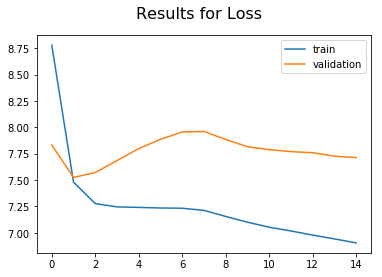

In [115]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Loss', fontsize=16)
plt.show()

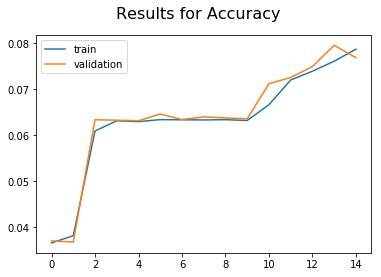

In [116]:
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Accuracy', fontsize=16)
plt.show()

- We can see that train and validation accuracies are low.But, we have got rid of stair-case fluctuation. 

- what could we do now? Either choose higher data points i.e 10,000. We ll do that in next steps.

- Choose random sample to see if things remain same